WEEK 6:
Implement K-NN algorithm to classify a dataset.

Accuracy: 0.7741093366093366
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4912
           1       0.57      0.32      0.41      1600

    accuracy                           0.77      6512
   macro avg       0.69      0.62      0.64      6512
weighted avg       0.75      0.77      0.75      6512

Confusion Matrix:
[[4525  387]
 [1084  516]]


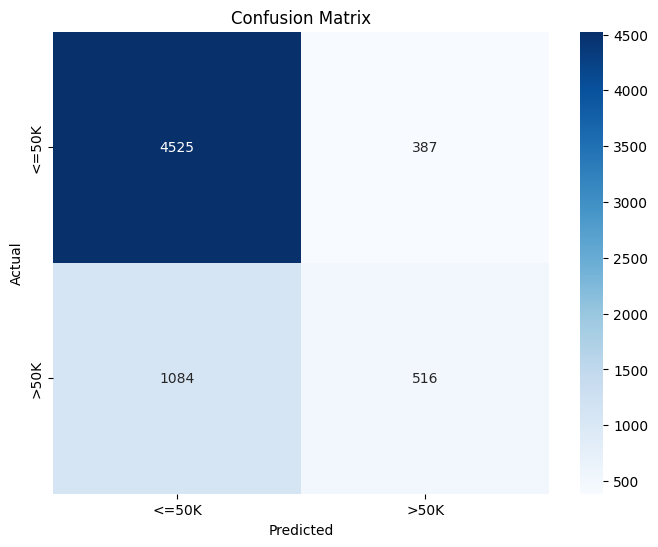

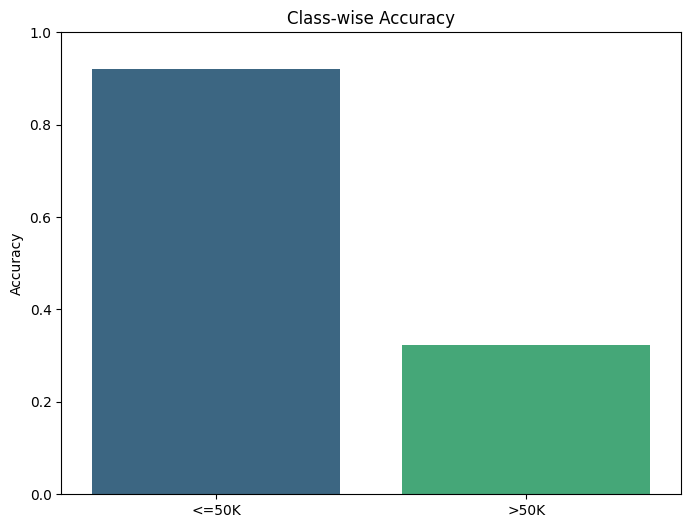

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'income.csv'  # Update this path with the correct location of your CSV file
data = pd.read_csv(file_path)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop(' <=50K', axis=1)
y = data[' <=50K']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize accuracy
labels = ['<=50K', '>50K']
accuracy_values = [conf_matrix[0, 0] / sum(conf_matrix[0, :]), conf_matrix[1, 1] / sum(conf_matrix[1, :])]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracy_values, palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()
